# Code and Thought Reference Statement

In the process of studying this topic, I can say that I "stand on the shoulders of giants to see the world". Without the experience and ideas provided by these pioneers, I will not be able to complete my work. Next, I will briefly state the source of the code and ideas I quoted to separate what they have done and what I have done on their basis.

The source of reference inspiration for the workflow ideas of the model is :
Nida Guler https://www.kaggle.com/nidaguler/eda-and-prediction-indians-diabetes/notebook :NO Preprocessing，No normalization

Vincent Lugat https://www.kaggle.com/vincentlugat/pima-indians-diabetes-eda-prediction-0-906/notebook: Median for zeros,Median for               outliers,5-Folds Cross Validation
Jason Li https://www.kaggle.com/dbsnail/diabetes-prediction-over-0-86-accuracy/data: Mean for zeros,But no outliers'                     processing,train:test=7:3,randomstate controlled
Chirag Samal https://www.kaggle.com/chirag9073/diabetes-using-deep-learning: Drop zero,But no outliers' processing,train:test=8:2,
Riddhi Mehta https://www.kaggle.com/rnmehta5/pima-indian-diabetes-binary-classification :zero and outliers' processing are refered
Tariq Mehmood and Harsh Mishra https://www.kaggle.com/tariqmhmd5/pima-india-diabetes-prediction-with-6-algorithms/comments: Median for zeros
My work：The combination of the above framework，Median for zero，,Median for outliers，Z-train:test=8:2,random_state controlled,
       5 models,gridsearch to optimize parameters,two ensemble functions,application to set the trained model.
       And for each step, the reasons and analysis for selecting this method are given in the report.It is worth mentioning that I am        very much in favor of the learning framework constructed by Tariq Mehmood and harsh Mishra, but there are some problems that I        have modified: 1. They ignored the outliers of insulin; 2. Some outliers have not been cleared completely, which have been          improved in my process.
           
The source of reference inspiration for the ensemble ideas of the model is :
Fares Sayah https://www.kaggle.com/faressayah/ensemble-ml-algorithms-bagging-boosting-voting/notebook#5.-Voting-Ensemble
His work：Bagging, Boosting, Voting ensemble algorithms
My work：The method of determining the GBM to determine the weight of each model

Code Reuse:
1.code block[6]：Tariq Mehmood and Harsh Mishra https://www.kaggle.com/tariqmhmd5/pima-india-diabetes-prediction-with-6-algorithms/comments in block[8] 
Reason:Reference to obtain the median of each method, simplify the code.
2.code block[11]:Vincent Lugat https://www.kaggle.com/vincentlugat/pima-indians-diabetes-eda-prediction-0-906/notebook
Reason：It is considered that the interface given by him is more intuitive, beautiful and clear.I made some changes to his code
3.code block[74]:Tariq Mehmood and Harsh Mishra https://www.kaggle.com/tariqmhmd5/pima-india-diabetes-prediction-with-6-algorithms/comments in block[73].
Reason:I don't know how to choose the layer number of ANN model, so we decide to select the model that has been built and then fine tune it


# Import Dependency Library / Package

In [1]:
# Classic,data manipulation and linear algebra
import numpy as np # Data science computing tools
import pandas as pd # Visualization

# Data visualization
import matplotlib.pyplot as plt # Numerical tools
import seaborn as sns # Advanced API of Matplotlib
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

%matplotlib inline 
# Drawing plot in notebook

from sklearn.model_selection import train_test_split,GridSearchCV,KFold # Divide data test and train set/Automatic parameter adjustment
from sklearn.preprocessing import StandardScaler # De mean and variance normalization
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc,precision_recall_curve,roc_auc_score
 # Confusion matrix/Show main classification indicators/Receiver operating characteristic/Classification accuracy score/Area Under Curve
from sklearn.linear_model import LogisticRegression # Logistic regression classification
from sklearn.svm import SVC #svm.SVC classification
from sklearn.neighbors import KNeighborsClassifier #KNN classification
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier #Randomforest classification
from keras.utils import np_utils # Be similar to tf.one_ hot()
from keras.models import Sequential,load_model # sequential model/load model
from keras.layers import Dense,Dropout,Activation,Conv2D,MaxPooling2D,Flatten 
 # Fully connected neural network layer/Dropout layer to prevent over fitting/Convolution neural network/MaxPooling layer/Flatten layer
import pickle # ackaging Model
# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# correlation matrix
from mlens.visualization import corrmat
# interface
from tkinter import *
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 
#define the seed
random_seed=2008

Using TensorFlow backend.
D:\Users\20085\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

D:\Users\20085\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

D:\Users\20085\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

D:\Users\20085\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (t

# Defining Functions

In [2]:
#Define the function of finding the median of each feature

def median_target(var):
    temp=df_copy[df_copy[var].notnull()]
    temp=temp[[var,'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp


In [3]:
#Define the method of ROC plot
def ROC_AUC(Y_test,y_pred_proba,Name):
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    roc_auc=auc(fpr,tpr)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label='ROC curve(area=%.2f)'%roc_auc)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.legend(loc='lower right')
    plt.title( '%s ROC curve'%Name)
    plt.grid()
    plt.show()

In [4]:
#Define the function of Set of models
def get_models():  
    models={'svm_rbf':SVM1,
           'knn':knn,
           'svm_linear':SVM2,
           'ANN':model,      
           'random forest':RF,
           'Logistic Regression':LR}
    return models

In [5]:
#Define the function of model sets
def train_predict(model_list):
    P=np.zeros((Y_test.shape[0],len(model_list))) #Shape of DataFrame 
    P=pd.DataFrame(P)
    
    print('Fitting models.')
    cols=list()
    for i,(name,m) in enumerate(models.items()):
        print('%s...'% name,end="",flush=False)  #Output the corresponding content after the request is completed
        P.iloc[:,i]=m.predict_proba(X_test)[:,1]  #Fill the predict value
        cols.append(name)        #get names
        print('done')    
    print('Done.\n')
    P.colunms=cols              #column names
    return P

In [6]:
#Define the function of scoring the models
def score_models(P,y_test):
    print('scoring models.')
    for m in P.columns:
        score=roc_auc_score(Y_test,P.iloc[:,m])
        print('%-26s:%.3f' %(m,score))
    print('Done.\n')

In [7]:
#Define the function of model report
def model_performance(model, subtitle) :   
    
    pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Confusion matrix
    y_pred=model.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto', textfont=dict(color='black'),
                    orientation = 'h', opacity = 1, marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))

    #Roc curve

    trace3 = go.Scatter(x=fpr, y=tpr,
                        name = "Roc : " ,
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=2, print_grid=False,
                          specs=[[{}, {}], 
                                 [{}, {}]],
                          subplot_titles=('Confusion Matrix',
                                          'Metrics',
                                          '',
                                          'ROC curve'+" "+ '('+ str(roc_auc)+')'
                                          ))
    #Trace and layout
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,2)
    fig.append_trace(trace4,2,2)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+subtitle,
                        autosize = False, height = 830, width = 830,
                        plot_bgcolor = 'black',
                        paper_bgcolor = 'black',
                        margin = dict(b = 195), font=dict(color='white'))
    fig["layout"]["xaxis1"].update(color = 'white')
    fig["layout"]["yaxis1"].update(color = 'white')
    fig["layout"]["xaxis2"].update((dict(range=[0, 1], color = 'white')))
    fig["layout"]["yaxis2"].update(color = 'white')
    fig["layout"]["xaxis4"].update(dict(title = "false positive rate"), color = 'white')
    fig["layout"]["yaxis4"].update(dict(title = "true positive rate"),color = 'white')
    for i in fig['layout']['annotations']:
        i['font'] = titlefont=dict(color='white', size = 14)
    py.iplot(fig)

In [8]:
#Define the function of ensemble model ROC plot
def plot_roc_curve(ytest, P_base_learners, P_ensemble, labels, ens_label):
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    cm = [plt.cm.rainbow(i)
      for i in np.linspace(0, 1.0, P_base_learners.shape[1] + 1)]
    
    for i in range(P_base_learners.shape[1]):
        p = P_base_learners[:, i]
        fpr, tpr, _ = roc_curve(Y_test, p)
        plt.plot(fpr, tpr, label=labels[i], c=cm[i + 1])

    fpr, tpr, _ = roc_curve(Y_test, P_ensemble)
    plt.plot(fpr, tpr, label=ens_label, c=cm[0])
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(frameon=False)
    plt.show()

In [9]:
#Define the function of training base learners
def train_base_learners(base_learners, inp, out, verbose=True):
    if verbose: print("Fitting models.")
    for i, (name, m) in enumerate(base_learners.items()):
        if verbose:print("%s..." % name, end=" ", flush=False)
        m.fit(inp, out)
        if verbose: print("done")

In [10]:
#Define the function of each base learners' prediction
def predict_base_learners(pred_base_learners, inp, verbose=True):
    P = np.zeros((inp.shape[0], len(pred_base_learners)))
    if verbose: print("Generating base learner predictions.")
    for i, (name, m) in enumerate(pred_base_learners.items()):
        if verbose: print("%s..." % name, end=" ", flush=False)
        p = m.predict_proba(inp)
        # With two classes, need only predictions for one class
        P[:, i] = p[:, 1]
        if verbose: print("done")
    return P

In [11]:
#Define the function of ensemble model's prediction
def ensemble_predict(base_learners, meta_learner, inp, verbose=True):
    P_pred = predict_base_learners(base_learners, inp, verbose=verbose)
    return P_pred, meta_learner.predict_proba(P_pred)[:, 1]

# Import Dataset

In [12]:
df=pd.read_csv('data\diabetes1.csv') # Loading the dataset

In [13]:
df.describe() # basic statistic details about the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df_copy = df.copy(deep = True) # Create a copy to avoid affecting the original data
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] =\
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
# Replace the 0 value with a null value
print(df_copy.isnull().sum()) # showing the count of NaNs

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


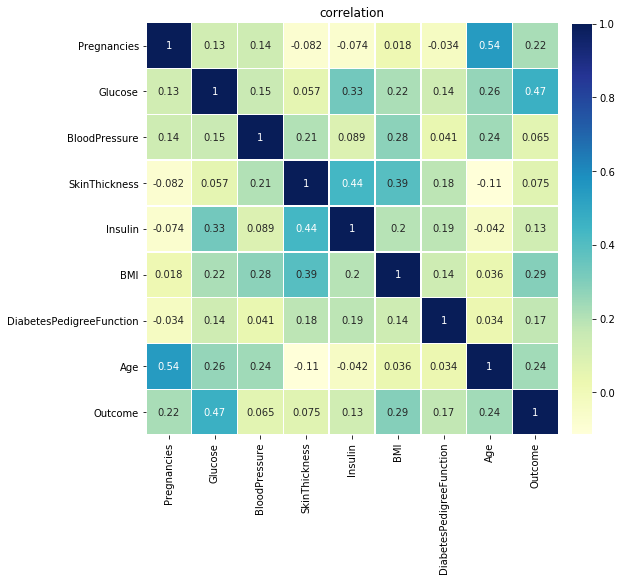

In [15]:
datacor=np.corrcoef(df,rowvar=0)# Pairwise calculation of Pearson product
datacor=pd.DataFrame(data=datacor,columns=df.columns,index=df.columns)
plt.figure(figsize=(8,8))# Set the size of the image
ax=sns.heatmap(datacor,square=True,annot=True,
              linewidth=0.5,cmap='YlGnBu',
              cbar_kws={'fraction':0.046,'pad':0.03}) # Heat mapping
ax.set_title('correlation')
plt.show()

# Zero Value Processing

In [16]:
#Fill in the null value with the median according to the property and the outcome
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['Glucose'].isnull()),'Glucose']=107.0
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['Glucose'].isnull()),'Glucose']=140.0
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['BloodPressure'].isnull()),'BloodPressure']=70.0
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['BloodPressure'].isnull()),'BloodPressure']=74.5
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['Insulin'].isnull()),'Insulin']=102.5
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['Insulin'].isnull()),'Insulin']=169.5
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['BMI'].isnull()),'BMI']=30.1
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['BMI'].isnull()),'BMI']=34.3
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['SkinThickness'].isnull()),'SkinThickness']=27.0
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['SkinThickness'].isnull()),'SkinThickness']=32.0

In [17]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Boxplot to Detect Outliers

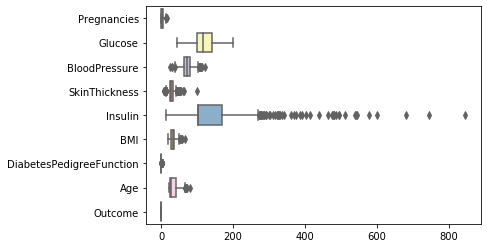

In [18]:
sns.boxplot(data=df_copy,orient='h',palette='Set3')

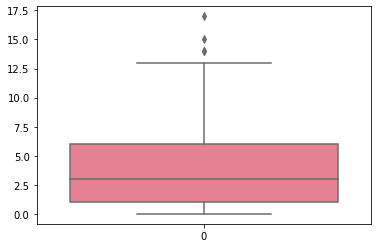

In [19]:
sns.boxplot(data=df_copy.Pregnancies)

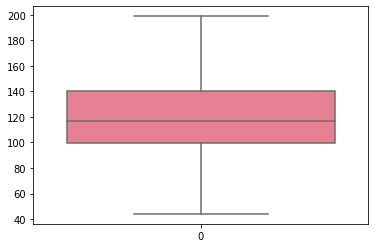

In [20]:
sns.boxplot(data=df_copy.Glucose)

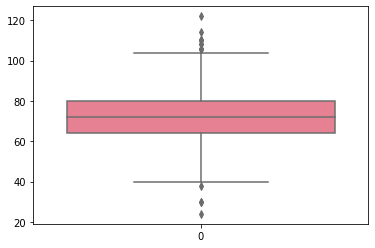

In [21]:
sns.boxplot(data=df_copy.BloodPressure)

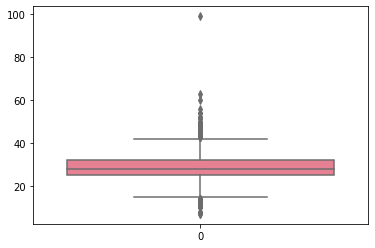

In [22]:
sns.boxplot(data=df_copy.SkinThickness)

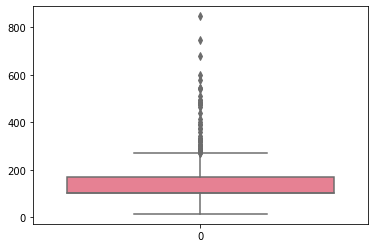

In [23]:
sns.boxplot(data=df_copy.Insulin)

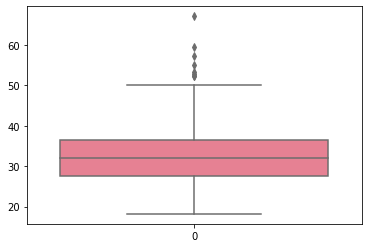

In [24]:
sns.boxplot(data=df_copy.BMI)

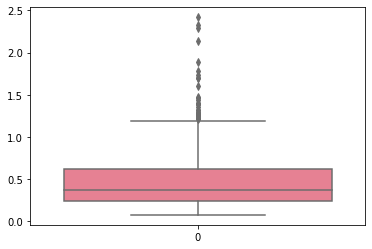

In [25]:
sns.boxplot(data=df_copy.DiabetesPedigreeFunction)

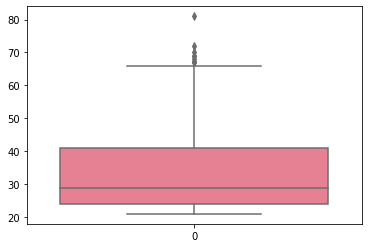

In [26]:
sns.boxplot(data=df_copy.Age)

# Median Calculation

In [27]:
median_target('Pregnancies')

,Outcome,Pregnancies
0,0,2
1,1,4


In [28]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [29]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [30]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [31]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [32]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [33]:
median_target('DiabetesPedigreeFunction')

,Outcome,DiabetesPedigreeFunction
0,0,0.336
1,1,0.449


In [34]:
median_target('Age')

,Outcome,Age
0,0,27
1,1,36


# Outliers Handling

In [35]:
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['Pregnancies']>13),'Pregnancies']=2
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['Pregnancies']>13),'Pregnancies']=4
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['BloodPressure']<40),'BloodPressure']=70
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['BloodPressure']>103),'BloodPressure']=70
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['BloodPressure']<40),'BloodPressure']=74.5
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['BloodPressure']>103),'BloodPressure']=74.5
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['SkinThickness']>39),'SkinThickness']=27
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['SkinThickness']<20),'SkinThickness']=27
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['SkinThickness']>39),'SkinThickness']=32
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['SkinThickness']<20),'SkinThickness']=32
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['Insulin']>270),'Insulin']=102.5
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['Insulin']>270),'Insulin']=169.5
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['BMI']>48),'BMI']=30.1
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['BMI']>48),'BMI']=34.3
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['DiabetesPedigreeFunction']>1),'DiabetesPedigreeFunction']=0.336
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['DiabetesPedigreeFunction']>1),'DiabetesPedigreeFunction']=0.449
df_copy.loc[(df_copy['Outcome']==0)&(df_copy['Age']>61),'Age']=27
df_copy.loc[(df_copy['Outcome']==1)&(df_copy['Age']>61),'Age']=36

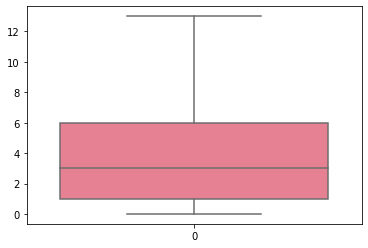

In [36]:
sns.boxplot(data=df_copy.Pregnancies)

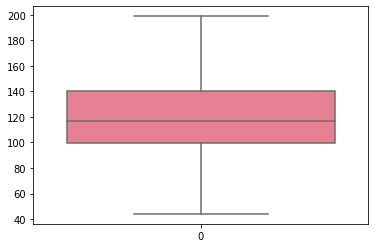

In [37]:
sns.boxplot(data=df_copy.Glucose)

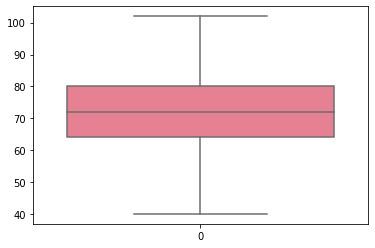

In [38]:
sns.boxplot(data=df_copy.BloodPressure)

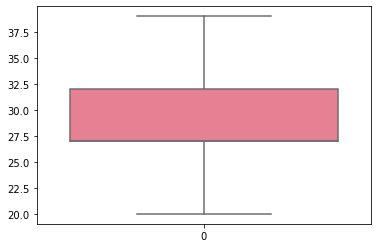

In [39]:
sns.boxplot(data=df_copy.SkinThickness)

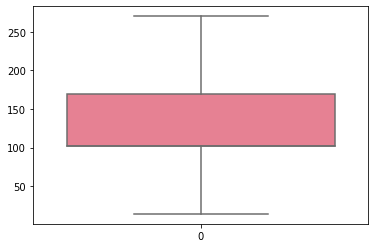

In [40]:
sns.boxplot(data=df_copy.Insulin)

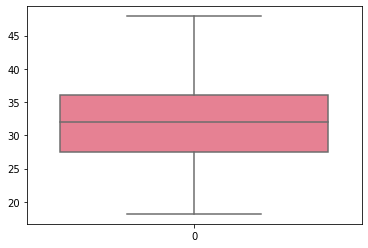

In [41]:
sns.boxplot(data=df_copy.BMI)

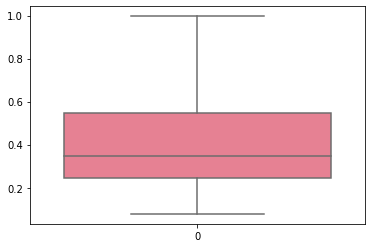

In [42]:
sns.boxplot(data=df_copy.DiabetesPedigreeFunction)

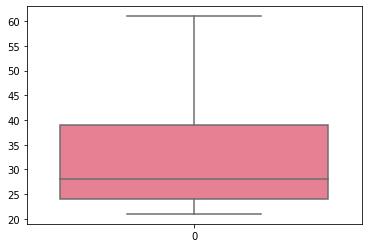

In [43]:
sns.boxplot(data=df_copy.Age)

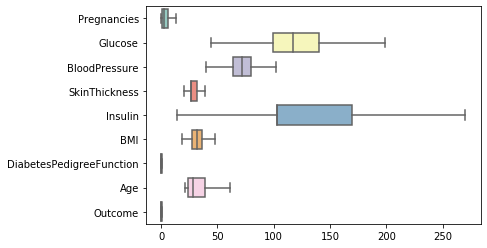

In [44]:
sns.boxplot(data=df_copy,orient='h',palette='Set3')

# Normalization

In [45]:
std=StandardScaler()

In [46]:
X=df_copy.drop(['Outcome'],1)
Y=df_copy['Outcome']

In [47]:
X_std=std.fit_transform(X)
X_new=pd.DataFrame(data=X_std,columns=X.columns)

# Split Data

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_new, Y, random_state=random_seed, test_size=0.2)

# KNN

In [49]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
y_pred=knn.predict(X_test)

In [51]:
confusion_matrix(Y_test,y_pred)

array([[93,  7],
       [ 5, 49]], dtype=int64)

In [52]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       100
           1       0.88      0.91      0.89        54

    accuracy                           0.92       154
   macro avg       0.91      0.92      0.92       154
weighted avg       0.92      0.92      0.92       154



In [53]:
model_performance(knn, 'KNN')

# LogisticRegression

In [54]:
LR=LogisticRegression(random_state=random_seed)
LR.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2008, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_pred_proba1 = LR.predict_proba(X_test)[:,1]
y_pred1=LR.predict(X_test)

In [56]:
confusion_matrix(Y_test,y_pred1)

array([[95,  5],
       [ 9, 45]], dtype=int64)

In [57]:
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       100
           1       0.90      0.83      0.87        54

    accuracy                           0.91       154
   macro avg       0.91      0.89      0.90       154
weighted avg       0.91      0.91      0.91       154



In [58]:
model_performance(LR, 'Logitic Regression')

# SVM(RBF)

In [59]:
SVM1=SVC(kernel='rbf',probability=True)
SVM1.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [60]:
y_pred_proba2 = SVM1.predict_proba(X_test)[:,1]
y_pred2=SVM1.predict(X_test)

In [61]:
confusion_matrix(Y_test,y_pred2)

array([[95,  5],
       [ 6, 48]], dtype=int64)

In [62]:
model_performance(SVM1, 'SVM_RBF')

# SVM(Linear)

In [63]:
SVM2=SVC(kernel='linear',probability=True)
SVM2.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [64]:
y_pred_proba3 = SVM2.predict_proba(X_test)[:,1]
y_pred3=SVM2.predict(X_test)

In [65]:
confusion_matrix(Y_test,y_pred3)

array([[96,  4],
       [ 7, 47]], dtype=int64)

In [66]:
print(classification_report(Y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       100
           1       0.92      0.87      0.90        54

    accuracy                           0.93       154
   macro avg       0.93      0.92      0.92       154
weighted avg       0.93      0.93      0.93       154



In [67]:
model_performance(SVM2, 'SVM_Linear')

# Random Forest

In [68]:
RF = RandomForestClassifier(random_state=random_seed)
RF.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2008,
                       verbose=0, warm_start=False)

In [69]:
y_pred4=RF.predict(X_test)
y_pred_proba4 = RF.predict_proba(X_test)[:,1]

In [70]:
accuracy_score(Y_test,y_pred4)

0.9415584415584416

In [71]:
confusion_matrix(Y_test,y_pred4)

array([[96,  4],
       [ 5, 49]], dtype=int64)

In [72]:
print(classification_report(Y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       100
           1       0.92      0.91      0.92        54

    accuracy                           0.94       154
   macro avg       0.94      0.93      0.94       154
weighted avg       0.94      0.94      0.94       154



In [73]:
model_performance(RF, 'Random Forest')

# ANN

In [74]:
model=Sequential()
model.add(Dense(32,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

In [75]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [76]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size=10,epochs=40,verbose=1,validation_data=(X_test,Y_test))
loss,accuracy=model.evaluate(X_test,Y_test,verbose=0)
print('Loss:'+str(loss))
print('Accuracy:'+str(accuracy*100.0))


Train on 614 samples, validate on 154 samples
Epoch 1/40
614/614 [==============================] - 0s 433us/step - loss: 0.6664 - accuracy: 0.6466 - val_loss: 0.6466 - val_accuracy: 0.6494
Epoch 2/40
614/614 [==============================] - 0s 199us/step - loss: 0.6367 - accuracy: 0.6515 - val_loss: 0.6243 - val_accuracy: 0.6494
Epoch 3/40
614/614 [==============================] - 0s 184us/step - loss: 0.6135 - accuracy: 0.6515 - val_loss: 0.5951 - val_accuracy: 0.6494
Epoch 4/40
614/614 [==============================] - 0s 184us/step - loss: 0.5811 - accuracy: 0.6564 - val_loss: 0.5492 - val_accuracy: 0.6623
Epoch 5/40
614/614 [==============================] - 0s 165us/step - loss: 0.5326 - accuracy: 0.7296 - val_loss: 0.4772 - val_accuracy: 0.7922
Epoch 6/40
614/614 [==============================] - 0s 172us/step - loss: 0.4714 - accuracy: 0.7899 - val_loss: 0.3973 - val_accuracy: 0.8377
Epoch 7/40
614/614 [==============================] - 0s 172us/step - loss: 0.4198 - accu

In [77]:
y_pred_proba5 = model.predict_proba(X_test)[:,1]
y_pred5=model.predict(X_test)

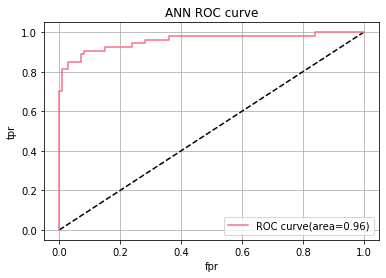

In [78]:
ROC_AUC(Y_test,y_pred_proba5,'ANN')

# Evaluation

In [79]:
cols=list()
for name in range(0,3):
    cols.append(name)
cols

[0, 1, 2]

In [80]:
import warnings
warnings.filterwarnings('ignore')
models=get_models()
P=train_predict(models)
score_models(P,Y_test)

Fitting models.
svm_rbf...done
knn...done
svm_linear...done
ANN...done
random forest...done
Logistic Regression...done
Done.

scoring models.
0                         :0.982
1                         :0.948
2                         :0.973
3                         :0.959
4                         :0.986
5                         :0.972
Done.



# Grid Search(KNN)

In [81]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':[ 1, 2, 3,4,5,6,7,8,9,10]};
grid = GridSearchCV(knn,param_grid,refit=True,verbose = 2);
grid.fit(X_train, Y_train);
grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .................................... n_neighbors=6, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .................................... n_neighbors=6, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .................................... n_neighbors=6, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .................................... n_neighbors=6, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .................................... n_neighbors=6, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] .................................... n_neighbors=7, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


{'n_neighbors': 5}

# Grid Search(Logistic Regression)

In [82]:
param_grid = {'C':[0.1, 1, 10, 100,1000]};
grid = GridSearchCV(SVM1,param_grid,refit=True,verbose = 2);
grid.fit(X_train, Y_train);
grid.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s finished


{'C': 1}

# Grid Search(SVM_RBF)

In [83]:
param_grid = {'C':[0.1, 1, 10, 100,1000], 'gamma':[1, 0.1, 0.01, 0.001]};
grid = GridSearchCV(SVM1,param_grid,refit=True,verbose = 2);
grid.fit(X_train, Y_train);
grid.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] 

[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished


{'C': 100, 'gamma': 0.01}

# Grid Search(SVM_Linear)[slow]

In [84]:
param_grid = {'C':[0.1, 1, 10, 100,1000], 'gamma':[1, 0.1, 0.01, 0.001]};
grid = GridSearchCV(SVM2,param_grid,refit=True,verbose = 2);
grid.fit(X_train, Y_train);
grid.best_params_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[CV] ................................ C=10, gamma=0.001, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.6s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.6s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.6s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.9s
[CV] C=100, gamma=1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.0min finished


{'C': 1, 'gamma': 1}

# Grid Search(Random Forest)

In [85]:
param_grid = {'n_estimators':[1, 10, 50, 100], 'max_features':[1,2,3,4,5,6]};
grid = GridSearchCV(RF,param_grid,refit=True,verbose = 2);
grid.fit(X_train, Y_train);
grid.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_features=1, n_estimators=1 ..................................
[CV] ................... max_features=1, n_estimators=1, total=   0.0s
[CV] max_features=1, n_estimators=1 ..................................
[CV] ................... max_features=1, n_estimators=1, total=   0.0s
[CV] max_features=1, n_estimators=1 ..................................
[CV] ................... max_features=1, n_estimators=1, total=   0.0s
[CV] max_features=1, n_estimators=1 ..................................
[CV] ................... max_features=1, n_estimators=1, total=   0.0s
[CV] max_features=1, n_estimators=1 ..................................
[CV] ................... max_features=1, n_estimators=1, total=   0.0s
[CV] max_features=1, n_estimators=10 .................................
[CV] .................. max_features=1, n_estimators=10, total=   0.0s
[CV] max_features=1, n_estimators=10 .................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. max_features=1, n_estimators=50, total=   0.1s
[CV] max_features=1, n_estimators=50 .................................
[CV] .................. max_features=1, n_estimators=50, total=   0.1s
[CV] max_features=1, n_estimators=50 .................................
[CV] .................. max_features=1, n_estimators=50, total=   0.1s
[CV] max_features=1, n_estimators=50 .................................
[CV] .................. max_features=1, n_estimators=50, total=   0.1s
[CV] max_features=1, n_estimators=50 .................................
[CV] .................. max_features=1, n_estimators=50, total=   0.1s
[CV] max_features=1, n_estimators=100 ................................
[CV] ................. max_features=1, n_estimators=100, total=   0.1s
[CV] max_features=1, n_estimators=100 ................................
[CV] ................. max_features=1, n_estimators=100, total=   0.1s
[CV] max_features=1, n_estimators=100 ................................
[CV] .

[CV] .................. max_features=4, n_estimators=50, total=   0.1s
[CV] max_features=4, n_estimators=50 .................................
[CV] .................. max_features=4, n_estimators=50, total=   0.1s
[CV] max_features=4, n_estimators=50 .................................
[CV] .................. max_features=4, n_estimators=50, total=   0.1s
[CV] max_features=4, n_estimators=50 .................................
[CV] .................. max_features=4, n_estimators=50, total=   0.1s
[CV] max_features=4, n_estimators=50 .................................
[CV] .................. max_features=4, n_estimators=50, total=   0.1s
[CV] max_features=4, n_estimators=100 ................................
[CV] ................. max_features=4, n_estimators=100, total=   0.2s
[CV] max_features=4, n_estimators=100 ................................
[CV] ................. max_features=4, n_estimators=100, total=   0.1s
[CV] max_features=4, n_estimators=100 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    7.5s finished


{'max_features': 2, 'n_estimators': 100}

# Optimized Model

In [86]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [87]:
LR=LogisticRegression(C=1,random_state=random_seed)
LR.fit(X_train,Y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2008, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
SVM1=SVC(kernel='rbf',probability=True,C=100,gamma=0.01)
SVM1.fit(X_train,Y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [89]:
SVM2=SVC(kernel='linear',probability=True,C=1,gamma=1)
SVM2.fit(X_train,Y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [90]:
RF = RandomForestClassifier(n_estimators=100,max_features=2,random_state=random_seed
                             )
RF.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2008,
                       verbose=0, warm_start=False)

In [91]:
cols=list()
for name in range(0,3):
    cols.append(name)
cols

[0, 1, 2]

In [92]:
models=get_models()
P=train_predict(models)
score_models(P,Y_test)

Fitting models.
svm_rbf...done
knn...done
svm_linear...done
ANN...done
random forest...done
Logistic Regression...done
Done.

scoring models.
0                         :0.971
1                         :0.948
2                         :0.973
3                         :0.959
4                         :0.986
5                         :0.972
Done.



In [93]:
#test samples' prediction results
cols=list()
for name in models.keys():
    cols.append(name)
    
P.columns=cols
P

,svm_rbf,knn,svm_linear,ANN,random forest,Logistic Regression
0,0.163211,0.0,0.234596,0.006183,0.17,0.318284
1,0.624737,1.0,0.604220,0.922975,0.91,0.493507
2,0.012776,0.0,0.054114,0.001916,0.01,0.012141
3,0.202938,0.4,0.278290,0.067418,0.16,0.529396
4,0.124922,0.0,0.130136,0.022303,0.05,0.059056
...,...,...,...,...,...,...
149,0.013778,0.0,0.019130,0.005677,0.00,0.009070
150,0.320371,0.8,0.463303,0.790473,0.61,0.808061
151,0.897044,1.0,0.814823,0.968758,0.93,0.861446
152,0.855842,0.8,0.778122,0.926354,1.00,0.847846


In [94]:
#mean ensemble prediction score
print('Ensemble roc_auc score: %.3f' % roc_auc_score(Y_test,P.mean(axis=1)))

Ensemble roc_auc score: 0.984


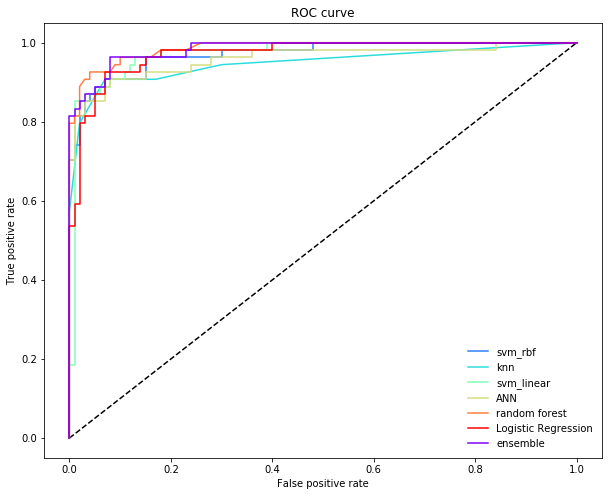

In [95]:
#
plot_roc_curve(Y_test, P.values, P.mean(axis=1), list(P.columns), "ensemble")

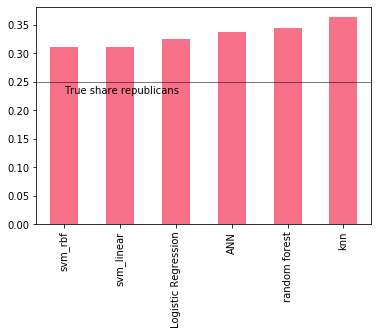

In [96]:
# View the scale predicted by each model
p=P.apply(lambda x: 1*(x>=0.5).value_counts(normalize=True))
p.index=['DEM','REP']
p.loc['REP',:].sort_values().plot(kind='bar')
plt.axhline(0.25,color='k',linewidth=0.5)
plt.text(0,0.23,'True share republicans')
plt.show()

In [97]:
# Redefine the function of Set of models
def get_models():  
    models={'svm_rbf':SVM1,
           'knn':knn,
           'svm_linear':SVM2,
           'ANN':model,      
           'random forest':RF,
           'Logistic Regression':LR}
    return models

In [98]:
# Define base learner
base_learners = get_models()

In [99]:
# Defining a meta learner
meta_learner = GradientBoostingClassifier(
   n_estimators=1000,
   loss="exponential",
   max_features=4,
   max_depth=3,
   subsample=0.5,
   learning_rate=0.005, 
   random_state=random_seed
)


In [100]:
#Split dataset
xtrain_base, xpred_base, ytrain_base, ypred_base = train_test_split(
   X_new, Y, test_size=0.5, random_state=random_seed)

In [101]:
#Train each base learner
train_base_learners(base_learners, xtrain_base, ytrain_base)

Fitting models.
svm_rbf... done
knn... done
svm_linear... done
ANN... Epoch 1/1
384/384 [==============================] - 0s 61us/step - loss: 0.1334 - accuracy: 0.9661
done
random forest... done
Logistic Regression... done


In [102]:
#Prediction of base learner
P_base = predict_base_learners(base_learners, xpred_base)

Generating base learner predictions.
svm_rbf... done
knn... done
svm_linear... done
ANN... done
random forest... done
Logistic Regression... done


In [103]:
#Train meta learner
meta_learner.fit(P_base, ypred_base)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.005, loss='exponential', max_depth=3,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2008, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [104]:
#Ensemble model score
P_pred, p = ensemble_predict(base_learners, meta_learner, X_test)
print("\nEnsemble ROC-AUC score: %.3f" % roc_auc_score(Y_test, p))

Generating base learner predictions.
svm_rbf... done
knn... done
svm_linear... done
ANN... done
random forest... done
Logistic Regression... done

Ensemble ROC-AUC score: 0.994


# Application Interface

In [105]:
root = Tk()# Interface windows
df1=pd.read_csv('data\diabetes1.csv')# load datasets
col=['Pregnant','Glucose','BP','Skin','Insulin','BMI','Pedigree_Function','Age','Outcome'] #Columns' names
df1.columns=col
X=df1.drop(['Outcome'],1)
def Standard(df,name):
    if df.loc[name,'Glucose']==0:
        df.loc[name,'Glucose']=121.6
    if df.loc[name,'BP']==0:
        df.loc[name,'BP']=72
    if df.loc[name,'Skin']==0:
        df.loc[name,'Skin']=29
    if df.loc[name,'Insulin']==0:
        df.loc[name,'Insulin']=141.7
    if df.loc[name,'BMI']==0:
        df.loc[name,'BMI']=32
    if df.loc[name,'Pedigree_Function']==0:
        df.loc[name,'Pedigree_Function']=0.408
    if df.loc[name,'Age']==0:
        df.loc[name,'Age']=32
    std=StandardScaler()
    df=std.fit_transform(df)
    return df
# 按扭调用的函数
def pre():
    Name = e_name.get()
    Preg = float(e_preg.get())
    Glu = float(e_glu.get())
    Blo = float(e_blo.get())
    Ski = float(e_ski.get())
    Ins = float(e_ins.get())
    Bmi = float(e_bmi.get())
    Dia = float(e_dia.get())
    Age = float(e_age.get())
    DATA={'Pregnant':Preg,'Glucose':Glu,'BP':Blo,'Skin':Ski,'Insulin':Ins,'BMI':\
        Bmi,'Pedigree_Function':Dia,'Age':Age}
    df=pd.DataFrame(DATA,index=[Name])
    df2=df.append(X)
    P_pred, p = ensemble_predict(base_learners, meta_learner,Standard(df2,Name)[0].reshape(1,-1))
    if p>=[0.5]:
        l_msg['text'] =Name+'has diabetes'
    if p< [0.5]:
        l_msg['text'] =Name+'are healthy'
# First line, name tag and input box
l_name = Label(root, text='Name：')
l_name.grid(row=0, sticky=W)
e_name = Entry(root)
e_name.grid(row=0, column=1, sticky=E)
# The second line, the prenant tag and the input box
l_preg = Label(root, text='Pregnant：')
l_preg.grid(row=1, sticky=W)
e_preg = Entry(root)
e_preg.grid(row=1, column=1, sticky=E)
# The third line, the glucose label and the input box
l_glu = Label(root, text='Glucose：')
l_glu.grid(row=2, sticky=W)
e_glu = Entry(root)
e_glu.grid(row=2, column=1, sticky=E)
# The fourth line, the blood pressure label and the input box
l_blo = Label(root, text='BP：')
l_blo.grid(row=3, sticky=W)
e_blo = Entry(root)
e_blo.grid(row=3, column=1, sticky=E)
# The fifth line, the skinthickness label and the input box
l_ski = Label(root, text='Skin：')
l_ski.grid(row=4, sticky=W)
e_ski = Entry(root)
e_ski.grid(row=4, column=1, sticky=E)
# The sixth line, the insulin label and the input box
l_ins = Label(root, text='Insulin：')
l_ins.grid(row=5, sticky=W)
e_ins = Entry(root)
e_ins.grid(row=5, column=1, sticky=E)
# The seventh line, the bmi label and the input box
l_bmi = Label(root, text='BMI：')
l_bmi.grid(row=6, sticky=W)
e_bmi = Entry(root)
e_bmi.grid(row=6, column=1, sticky=E)
# The eighth line, the diabetspedigreefunction label and the input box
l_dia = Label(root, text='Pedigree_Function：')
l_dia.grid(row=7, sticky=W)
e_dia = Entry(root)
e_dia.grid(row=7, column=1, sticky=E)
# The ninth line, the age label and the input box
l_age= Label(root, text='Age：')
l_age.grid(row=8, sticky=W)
e_age= Entry(root)
e_age.grid(row=8, column=1, sticky=E)
# Tenth line,prediction button，command binding pre events
b_login = Button(root, text='predict', command=pre)
b_login.grid(row=9, column=1, sticky=E)
# Eleventh line,Display results
l_msg = Label(root, text='')
l_msg.grid(row=10)

root.mainloop()